In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function
from PIL import Image

In [9]:
datafile = 'ex3data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
#Insert a column of 1's to X as usual
X = np.insert(X,0,1,axis=1)

#X is 5000 images. Each image is a row. Each image has 400 pixels unrolled (20x20)
#y is a classification for each image. 1-10, where "10" is the handwritten "0"

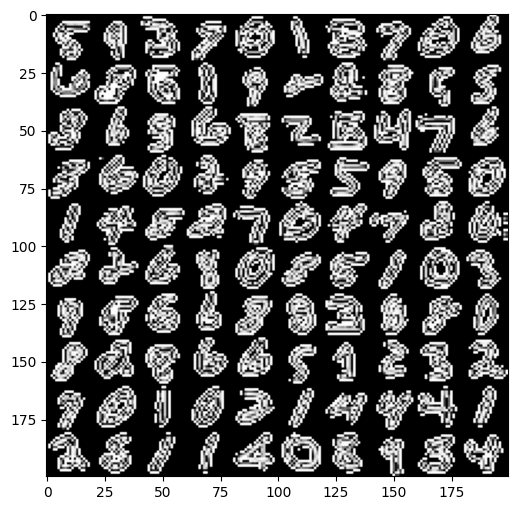

In [10]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    creates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row[1:].reshape(width, height)
    return square.T

def displayData(indices_to_display=None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows * ncols)

    big_picture = np.zeros((height * nrows, width * ncols))

    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow * height:irow * height + iimg.shape[0], icol * width:icol * width + iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6, 6))
    img = Image.fromarray((big_picture * 255).astype(np.uint8))
    plt.imshow(img, cmap=cm.Greys_r)

displayData()